<div class = 'alert alert-block alert-info'>

<h1 style="font-family:verdana;"> Description:</h1> 

<ul>
<li><p style="font-family:verdana;">
In this notebook, we are going to perform EDA on the Indian startup funding dataset and also we will infer some insights and try to answer certain questions about the Indian startup ecosystem.
</p></li>   
</ul>

</div>

## Step 1: Import libraries and dataset

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
st = pd.read_csv("C:/Users/tejas/OneDrive/Desktop/startup_funding.csv")
df = st.copy()

## Step 2: Understanding the Dataset

In [33]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [34]:
#dataset dimensions
df.shape

(2372, 10)

In [35]:
#Features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
In the dependent feature i.e. 'Amount in USD' some preprocessing needs to be done like removing commas and dealing with null values.
</p></li>
    
</ul>
</div>

## Step 3: Data Preprocessing

In [36]:
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: str(x).replace(',', ''))

In [37]:
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : str(x).replace("undisclosed", "0"))
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : str(x).replace("Undisclosed", "0"))
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : str(x).replace("unknown", "0"))
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : str(x).replace("14342000+", "0"))
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa010000000", "0"))
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa05000000", "0"))
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa019350000", "0"))
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0600000", "0"))
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa020000000", "0"))
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0N/A", "0"))
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa016200000", "0"))
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : str(x).replace("\\\\xc2\\\\xa0685000", "0"))
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x : str(x).replace("nan", "0"))

In [38]:
df['AmountInUSD'] = pd.to_numeric(df['AmountInUSD'])

In [39]:
df['AmountInUSD'].value_counts(normalize = True).head(10).mul(100).round(2).astype(str) + ' %'

AmountInUSD
0           35.71 %
1000000      5.48 %
500000       3.84 %
100000       2.32 %
2000000      2.32 %
5000000      2.11 %
3000000      2.11 %
10000000     1.94 %
200000       1.73 %
150000       1.69 %
Name: proportion, dtype: object

In [40]:
df['AmountInUSD'] = df['AmountInUSD'].replace(0, np.nan)

In [41]:
df['AmountInUSD'].fillna(df['AmountInUSD'].mean(), inplace = True)
df['InvestorsName'].fillna('Unknown', inplace=True)
df['CityLocation'].fillna('Unknown', inplace=True)
df['IndustryVertical'].fillna('Unknown', inplace=True)
df['StartupName'].fillna('Unknown', inplace=True)

In [42]:
# Replacing Common Words
df['CityLocation'].replace('Delhi','New Delhi',inplace=True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace = True)
df['InvestmentType'].replace('DebtFunding','Debt Funding',inplace = True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace = True)
df['IndustryVertical'].replace('eCommerce', 'Ecommerce', inplace=True)
df['IndustryVertical'].replace('ECommerce', 'Ecommerce', inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

In [43]:
def separateCity(city):
    return city.split('/')[0].strip()

df['CityLocation']=df['CityLocation'].apply(separateCity)

## Step 4: Exploratory Data Analysis

# Number of Funding

In [44]:
df['Year'] = df['Date'].str[-4:]

year = df['Year'].value_counts()
year.sort_index(inplace=True)

index = year.index
value = year.values

for i in range (len(year)):
    print(index[i],value[i])

2015 936
2016 993
2017 443


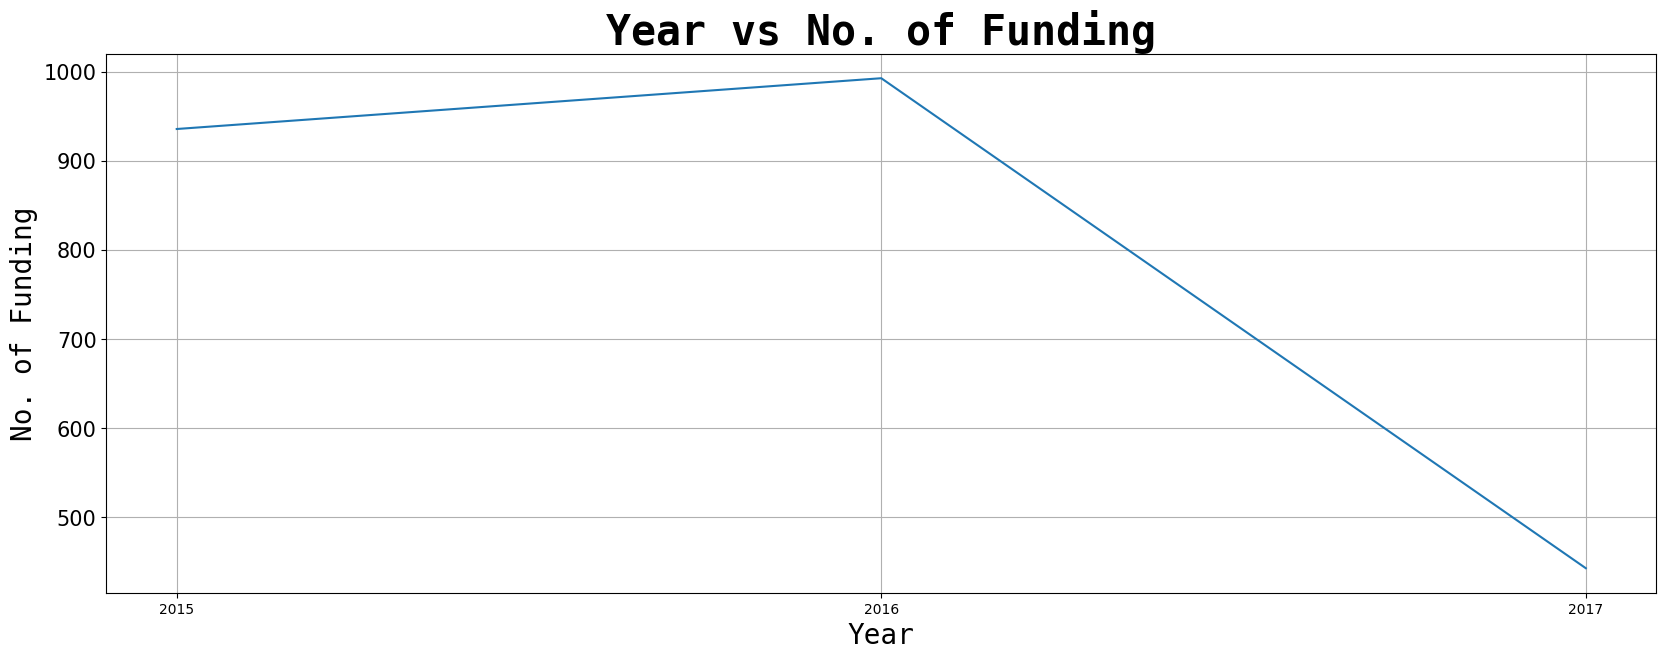

In [45]:
plt.figure(figsize=(20, 7))
sns.lineplot(y=year.values, x=year.index)
plt.xlabel('Year', fontdict={'fontname': 'Monospace', 'fontsize': 20})
plt.ylabel('No. of Funding', fontdict={'fontname': 'Monospace', 'fontsize': 20})
plt.title('Year vs No. of Funding', fontdict={'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)
plt.grid()
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;">Observations:</h3>

<ul>
<li><p style="font-family:verdana;">In the above line plot, we can see that the number of fundings made during the year 2015 and 2016 are almost same and there was no drastic increase or decrease</p></li>
<li><p style="font-family:verdana;">There is a sharp decrease of fundings made during the year 2016 and 2017</p></li>
</ul>

</div>

# Top Indian Cities

In [46]:
cities = df[df['CityLocation'] != 'Unknown']['CityLocation'].value_counts()[:10]

index = cities.index
value = cities.values

for i in range(len(cities)):
    print(index[i], value[i])

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


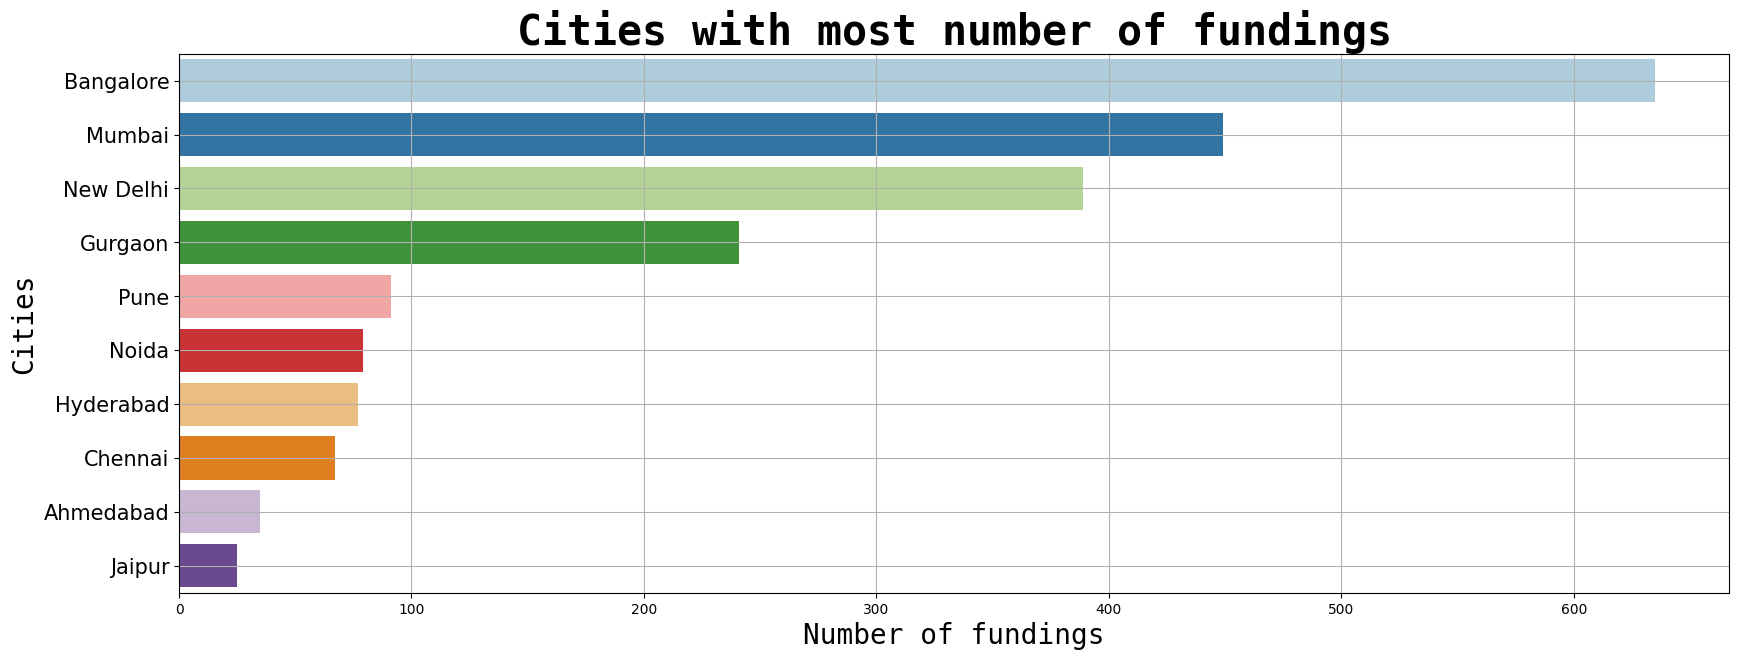

In [47]:
plt.figure(figsize = (20, 7))
sns.barplot(x = cities.values, y = cities.index, palette = 'Paired')
plt.title('Cities with most number of fundings', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Number of fundings', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Cities', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)
plt.grid()
plt.show()

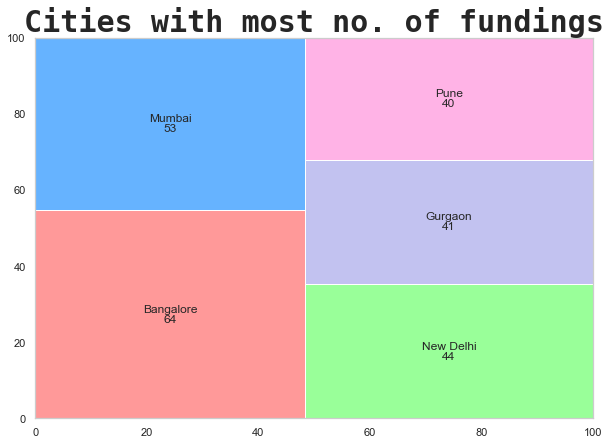

In [1100]:
import squarify
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffcc99', '#c2f0f0', '#99ccff', '#f0e6c2']

plt.figure(figsize=(10, 7))

squarify.plot(sizes=values, label=index, value=values, color=custom_colors)

plt.title('Cities with most no. of fundings', fontdict={'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;">Observations:</h3>

<ul>
<li><p style="font-family:verdana;">Cities like Bangalore, Mumbai and New Delhi are most funded cities</p></li>
<li><p style="font-family:verdana;">In the lower end, cities like Jaipur and Ahmedabad are least funded cities</p></li>
<li><p style="font-family:verdana;">From graph we can infer that startups in cities like Bangalore will have higher chances of getting funded</p></li>
</ul>

</div>

### Funding Amount

In [48]:
filtered_df = df[df['CityLocation'] != 'Unknown']

grouped_df = filtered_df.groupby('CityLocation')['AmountInUSD'].sum().nlargest(10)

total_funding = grouped_df.sum()
city_percentages = (grouped_df / total_funding) * 100

for city, percentage in city_percentages.items():
    print(city, '{:0.2f}'.format(percentage))


Bangalore 42.77
New Delhi 18.92
Mumbai 15.83
Gurgaon 11.44
Pune 2.85
Chennai 2.51
Noida 2.19
Hyderabad 1.82
Ahmedabad 0.84
Jaipur 0.83


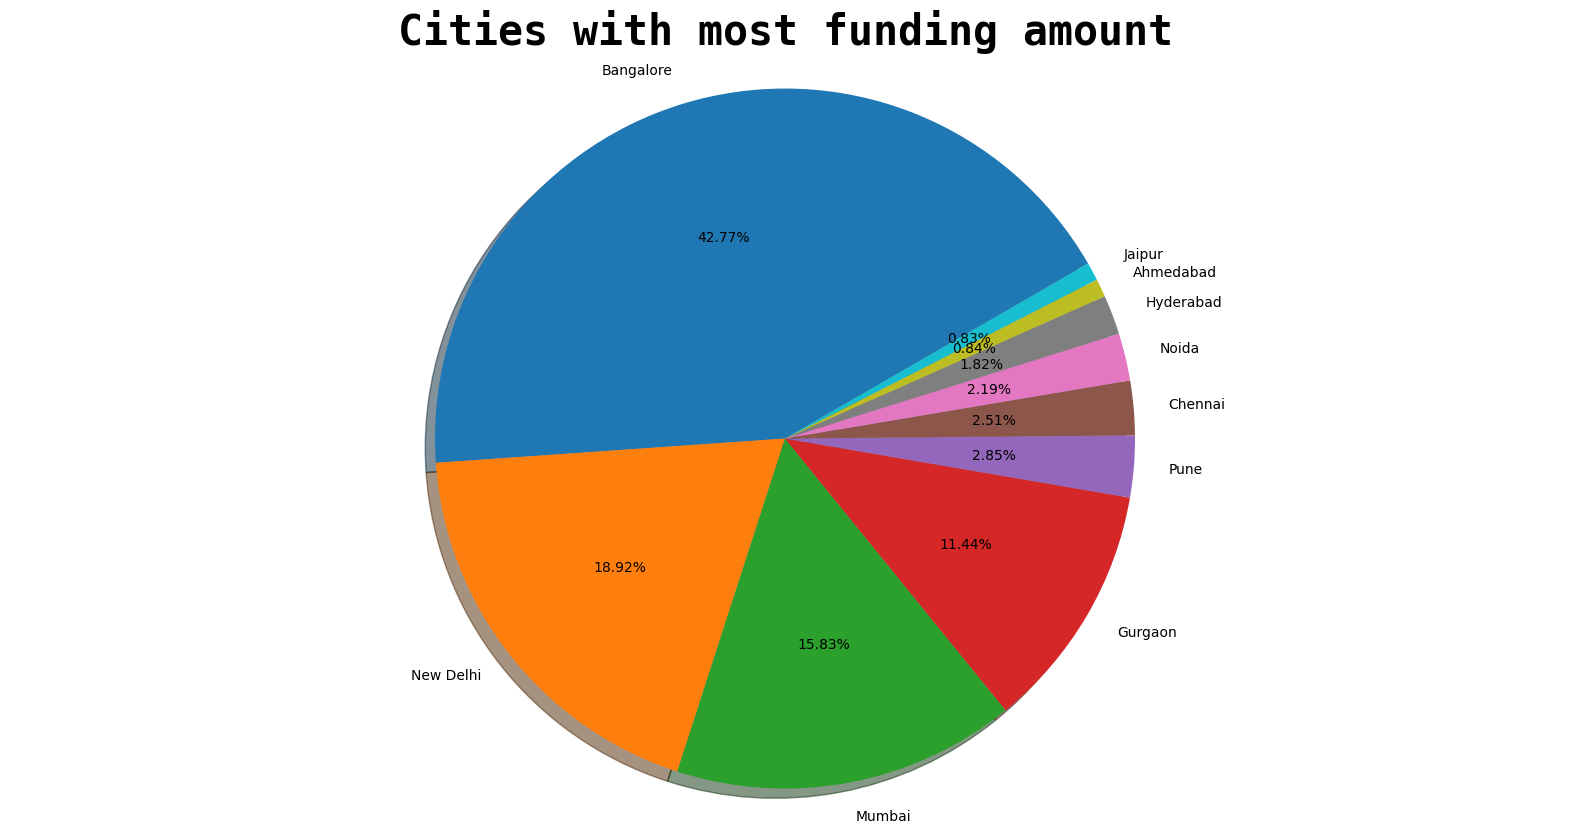

In [49]:
plt.figure(figsize = (20, 10))
plt.pie(city_percentages.values, labels = city_percentages.index, startangle = 30, shadow = True, autopct = '%1.2f%%')
plt.axis('equal')
plt.title('Cities with most funding amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;">Observations:</h3>

<ul>
<li><p style="font-family:verdana;">Cities like Bangalore, New Delhi, and Mumbai are receiving highest amount of funding</p></li>
</ul>

</div>

### Investment Type

In [50]:
grouped_df = df.groupby('InvestmentType')['AmountInUSD'].sum().nlargest()

total = grouped_df.sum()
percentage = (grouped_df/total)*100

for inv,per in percentage.items():
    print(inv,'{:0.2f}'.format(per))

Private Equity 73.21
Seed Funding 26.77
Debt Funding 0.03
Crowd Funding 0.00


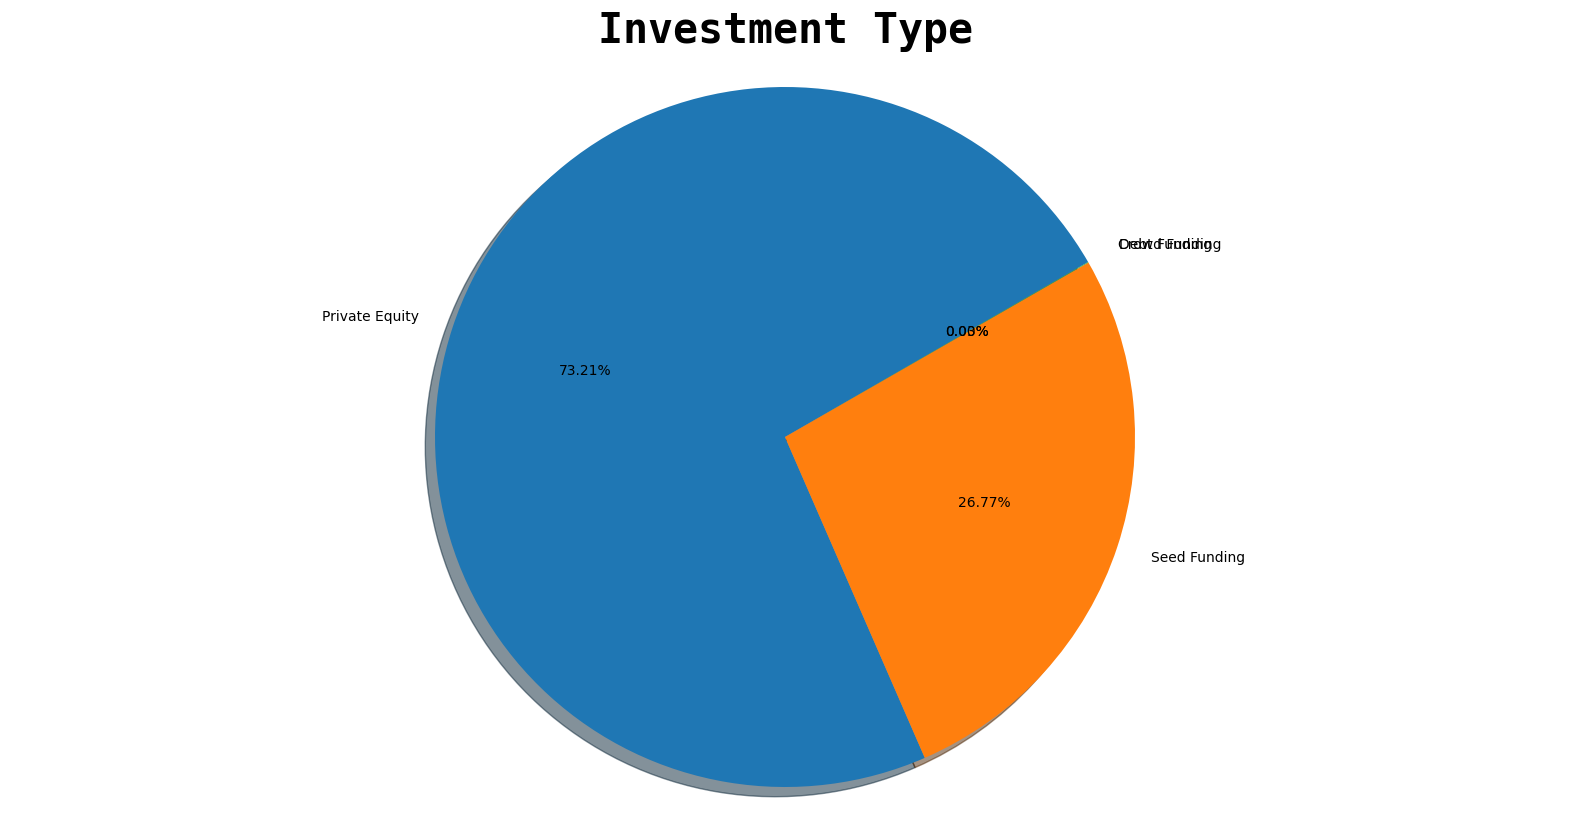

In [51]:
plt.figure(figsize = (20, 10))
plt.pie(percentage.values, labels = percentage.index, startangle = 30, shadow = True, autopct = '%1.2f%%')
plt.axis('equal')
plt.title('Investment Type', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;">Observations:</h3>

<ul>
<li><p style="font-family:verdana;">The major types of investment are Private Equity and Seed funding</p></li>
</ul>

</div>

### Top Industries

In [52]:
grouped_df = df[df['IndustryVertical'] != 'Unknown'].groupby('IndustryVertical')['AmountInUSD'].sum().nlargest()

# Calculate the total sum of 'AmountInUSD'
total = grouped_df.sum()

# Calculate the percentage
percentage = (grouped_df / total) * 100

# Print the percentages
for ind, per in percentage.items():
    print(ind, '{:0.2f}'.format(per))


Consumer Internet 44.99
Ecommerce 31.28
Technology 15.49
Online Marketplace 4.18
E-Commerce & M-Commerce platform 4.06


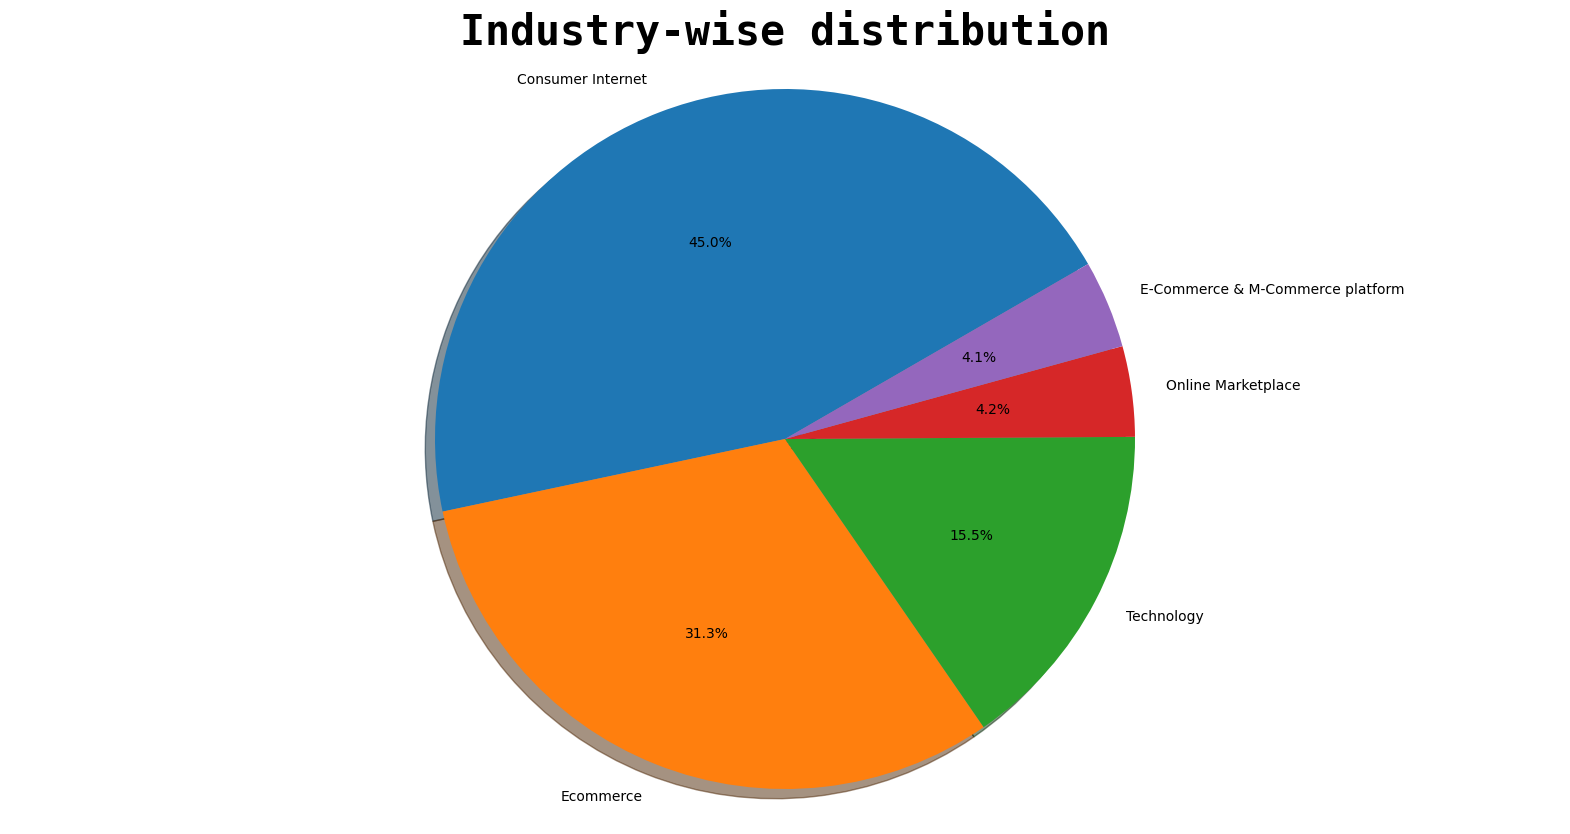

In [53]:
plt.figure(figsize = (20, 10))
plt.pie(percentage.values, labels = percentage.index, startangle = 30, shadow = True, autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Industry-wise distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;">Observations:</h3>

<ul>
<li><p style="font-family:verdana;">In the above pie chart we can see that Consumer Internet, Ecommerce and Technology startups make upto 91.8% of the market</p></li>

</div>

### Top startups

In [54]:
grouped_df = df.groupby('StartupName')['AmountInUSD'].sum().nlargest(20)

name = grouped_df.index

for i in range (len(name)):
    print(name[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo
Quikr
Delhivery
Foodpanda
BigBasket
MakeMyTrip
Hike
Byju’s
Swiggy
Grofers
CarTrade
Ecom Express
FreeCharge
Pepperfry
Rivigo
Saavn


In [55]:
from wordcloud import WordCloud, STOPWORDS

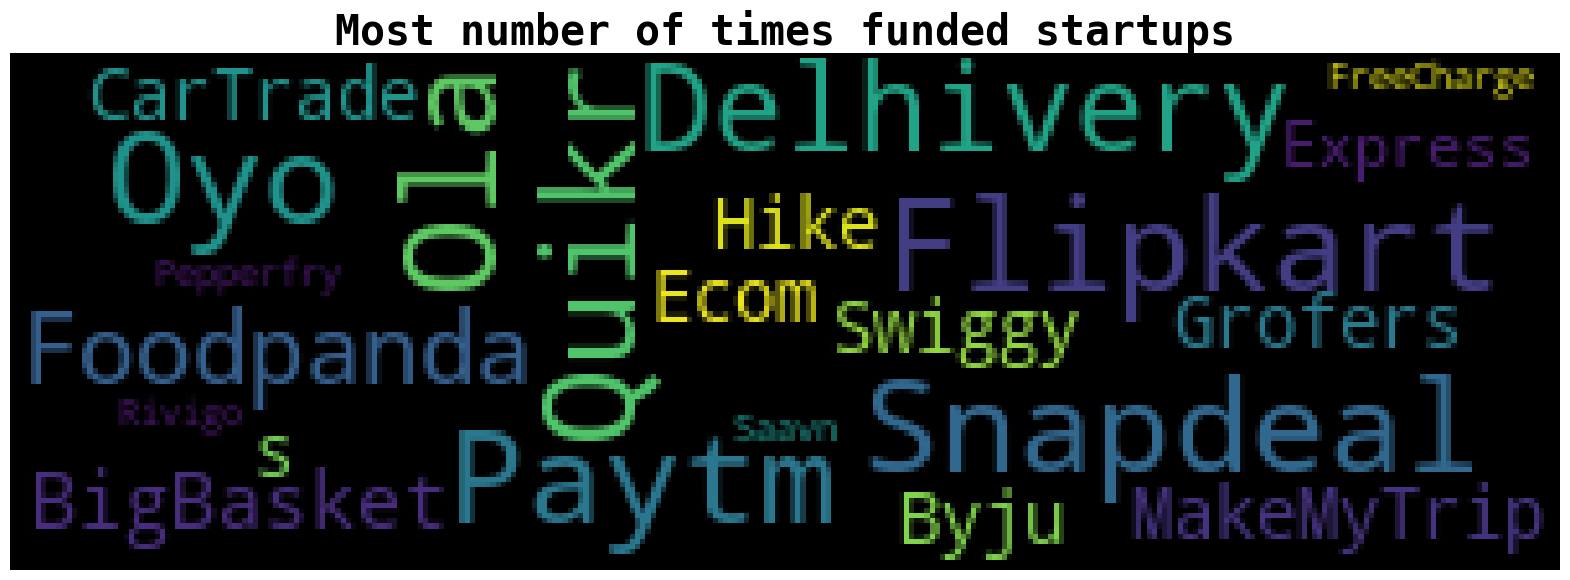

In [56]:
# Creating a wordcloud of startup names
plt.figure(figsize = (20, 7))
wordcloud = WordCloud(max_font_size = 25, width = 300, height = 100).generate(' '.join(name))
plt.title('Most number of times funded startups', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;">Observations:</h3>

<ul>
<li><p style="font-family:verdana;">Paytm and Flipkart are most funded startups</p></li>

</div>

### Startups with most Funding Rounds

In [57]:
count = df['StartupName'].value_counts().nlargest(10)

name = count.index
no_of_funding = count.values

for i in range (len(name)):
    print(name[i],no_of_funding[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6
Medinfi 5
Jugnoo 5
NoBroker 5
Flipkart 5
Niki.ai 4


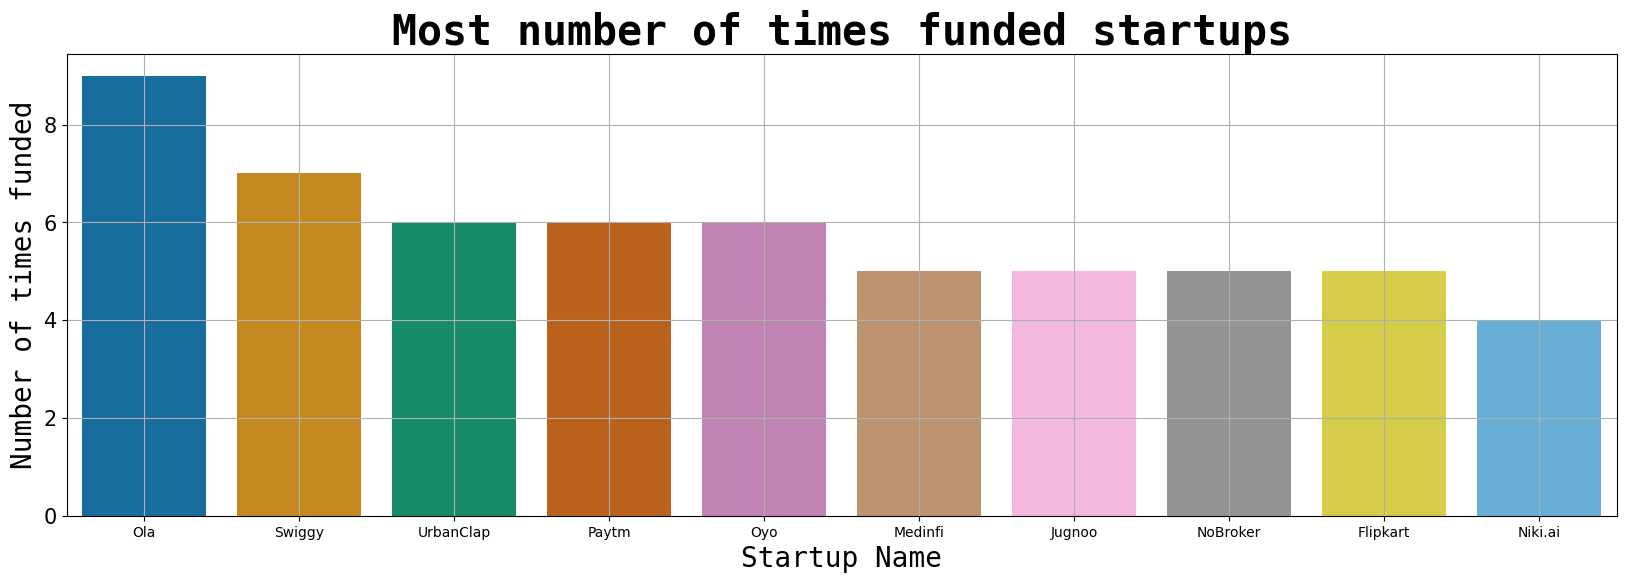

In [58]:
plt.figure(figsize=(20, 6))

sns.barplot(x=count.index, y=count.values, palette='colorblind')

plt.title('Most number of times funded startups', fontdict={'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.xlabel('Startup Name', fontdict={'fontname': 'Monospace', 'fontsize': 20})
plt.ylabel('Number of times funded', fontdict={'fontname': 'Monospace', 'fontsize': 20})
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)
plt.grid()
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;">Observations:</h3>

<ul>
<li><p style="font-family:verdana;">Ola, swiggy and UrbanClap were funded the most number of times</p></li>
</ul>

</div>

### Top Investors

In [59]:
d={}

def names(invest):
    l = invest.split(',')
    for i in l:
        i = i.strip()
        if i in d:
            d[i] += 1
        else:
            d[i] = 1
    return l
            
df['InvestorsName'].apply(names)

key = np.array(list(d.keys()))
values = np.array(list(d.values()))

ind = values.argsort()[::-1]
ind=ind[:5]

key = key[ind]
values = values[ind]

for i in range (len(key)):
    print(key[i],values[i])

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


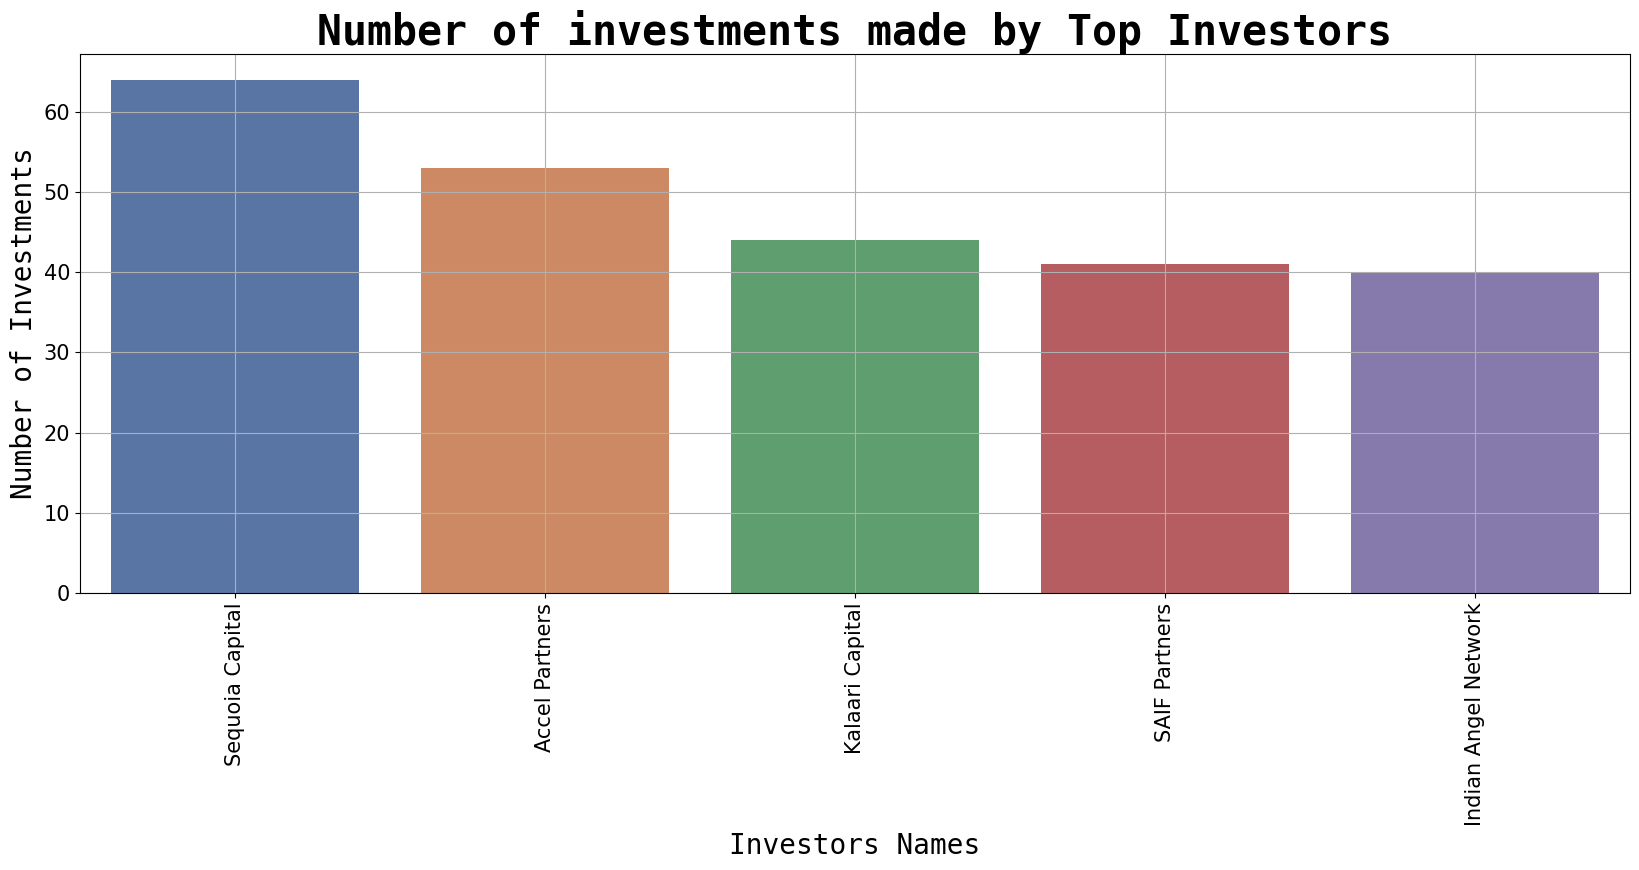

In [60]:
plt.figure(figsize=(20, 7))
sns.barplot(x=key, y=values, palette='deep')
plt.title('Number of investments made by Top Investors', fontdict={'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.xlabel('Investors Names', fontdict={'fontname': 'Monospace', 'fontsize': 20})
plt.ylabel('Number of Investments', fontdict={'fontname': 'Monospace', 'fontsize': 20})
plt.tick_params(labelsize=15)
plt.xticks(rotation='vertical')
plt.grid()
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;">Observations:</h3>

<ul>
<li><p style="font-family:verdana;">Top investors in Indian Startup Ecosystem are Sequoia Capital, Accel Partners and Kalaari Capital</p></li>
</ul>

</div>

<div class="alert alert-block alert-info">

<h2 style="font-family:verdana;">Conclusion:</h2>

<ul>
<li><p style="font-family:verdana;">
Consumer Internet, Ecommerce and Technology startups make upto 91.8% of the market like flipkart.</p></li>
<li><p style="font-family:verdana;">Cities like Bangalore, Mumbai and New Delhi are most funded cities, which may be due to the fact that talent availability is massive in those cities.</p></li>
<li><p style="font-family:verdana;">Most of the fundings are either of Private Equity and Seed Funding type.</p></li>
<li><p style="font-family:verdana;">Top investors in Indian Startup Ecosystem are Sequoia Capital, Accel Partners and Kalaari Capital</p></li>
<li><p style="font-family:verdana;">Paytm and Flipkart are most funded startups whereas Ola, swiggy and UrbanClap were funded the most number of times.</p></li>
</ul>

</div>